# Bharat Intern

## Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

## Importing libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 

## Loading dataset

In [66]:
cols = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
file_path = 'Titanic-Dataset.csv'
df = pd.read_csv(file_path, sep = ',')

In [67]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Description

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Data Preprocessing

- Drop irrelevant columns and handle missing values

In [72]:
df.drop('Cabin', axis=1, inplace=True)

In [73]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [74]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing values in 'Fare' column with median

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Convert categorical variables

In [76]:
# Convert categorical variables to numeric (e.g., 'Sex' column)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [77]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])  # Convert 'Embarked' to one-hot encoding

## Outlier detection and treatment

In [78]:
z_scores = zscore(df[['Age', 'Fare']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keep only rows where both 'Age' and 'Fare' z-scores are less than 3
df = df[filtered_entries]

- Split the dataset into features (X) and target variable (y)

In [79]:
X = df_encoded.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df_encoded['Survived']

- Split the dataset into training and testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Build and train the logistic regression model

## Model Training

In [81]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Model Evaluation

In [82]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8101694915254237


## Make Predictions

- Draw Outliers

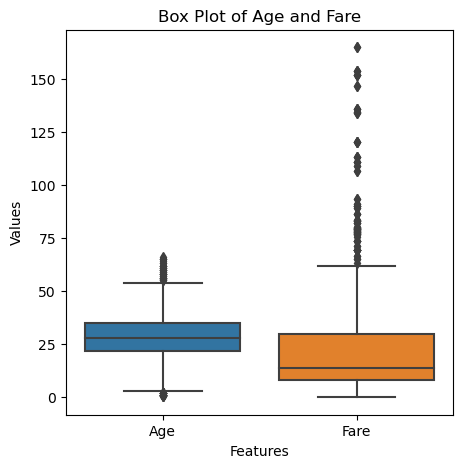

In [83]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Box Plot of Age and Fare')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

## Survival Prediction

In [84]:
y_pred = model.predict(X_test)

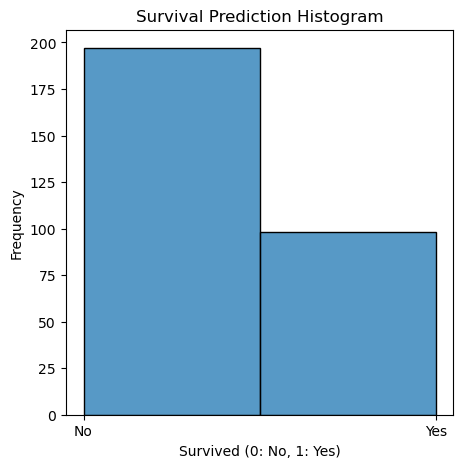

In [85]:
plt.figure(figsize=(5, 5))
sns.histplot(y_pred, kde=False, bins=2)
plt.title('Survival Prediction Histogram')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Conclusion

In [86]:
print("Number of outliers:", df.shape[0] - X.shape[0])
print("Accuracy of the model:", accuracy)


Number of outliers: -27
Accuracy of the model: 0.8101694915254237
